# ELEN 644: CV1
## Homework 1 

## Problem 1: Filtering 

1. Apply Gaussian filtering for sigma = 1, 5, 10, and 100 to each of the 10 images from the CIFAR-10 dataset. 
Plot the filtered image. 

2. Apply a moving average & median filter on the images and plot them. 
What are the differences between the filtered image of the Gaussaian, Median and Mean filter? Which do you prefer? 


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cv2
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
%matplotlib inline


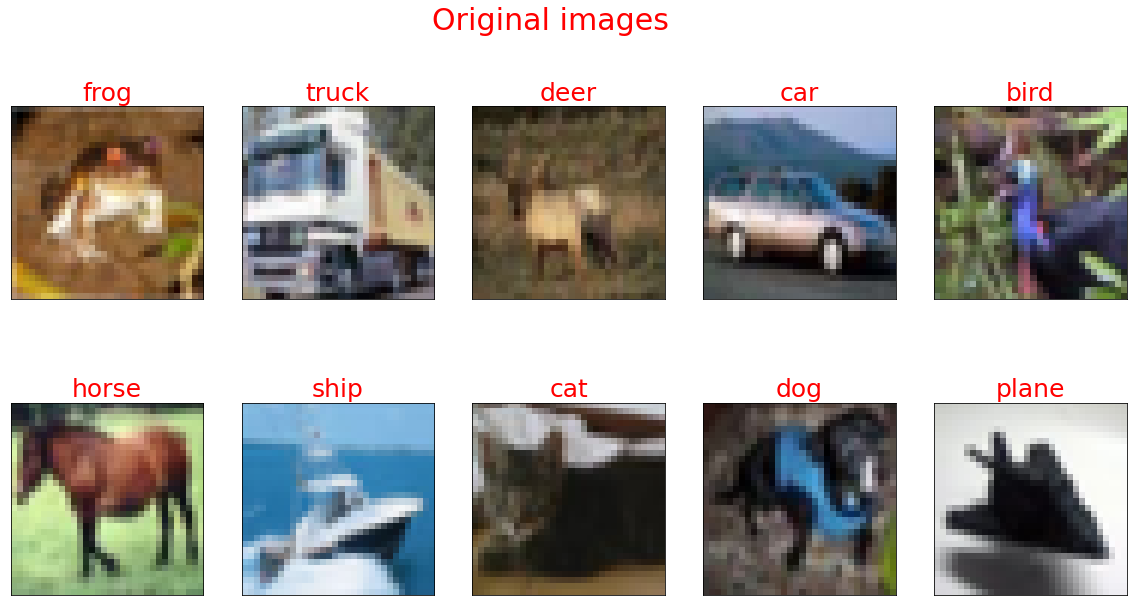

In [6]:
# Obtaining CIFAR 10 images 

# Downloading CIFAR 10 via Tensorflow 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Frog 
frog = x_train[0]
#plt.imshow(frog)

# Truck 
truck = x_train[1]
#plt.imshow(truck)

# Deer
deer = x_train[3]
#plt.imshow(deer)

# Automobile 
car = x_train[4]
#plt.imshow(car)

# Bird 
bird = x_train[24]
#plt.imshow(bird)

# Horse 
horse = x_train[7]
#plt.imshow(horse)

# Ship 
ship = x_train[8]
#plt.imshow(ship)

# Cat
cat = x_train[9]
#plt.imshow(cat)

# Dog 
dog = x_train[27]
#plt.imshow(dog)

# Plane 
plane = x_train[29]
#plt.imshow(plane)

img = [frog, truck, deer, car, bird, horse, ship, cat, dog, plane]
titles = ['frog', 'truck', 'deer', 'car', 'bird', 'horse', 'ship', 'cat', 'dog', 'plane']

# Plotting the original images 
plt.figure(figsize=(20,10))
for i in range(len(img)):
    plt.subplot(2,5,i+1), plt.imshow(img[i])
    plt.title(titles[i], color='red',fontsize=25)
    plt.xticks([]), plt.yticks([])

plt.suptitle(t='Original images', color='red', fontsize=30)
plt.show()

### Gaussian Filter

1.  Describe observation as $\sigma$ value of the Gaussian filter increases 

Analysis: <br>
As the value of $\sigma$ increases, the the output image appears to be more smoothed/blurred. More of the image details are removed due to the removal of high-frequency content in the image. 

In [7]:
def gauss_blur(image,sigma):
    """ 
    Input:  img: list of input images
            sigma: sigma value for gaussian blurring

    Output: images after gaussing blur has been applied 
    """
   
    gaus_blurred_im = []

    # Apply Gaussian Blur
    for i in range(len(image)):
        gblur = cv2.GaussianBlur(image[i],(5,5),sigma)
        gaus_blurred_im.append(gblur)

    # Display resulting images 
    plt.figure(figsize=(20,10))
    for i in range(len(gaus_blurred_im)):
        plt.subplot(2,5,i+1), plt.imshow(gaus_blurred_im[i])
        plt.title(titles[i], color='red',fontsize=25)
        plt.xticks([]), plt.yticks([])

    plt.suptitle(t='Gaussian blur sigma='+str(sigma), color='red', fontsize=30)
    plt.show()
    


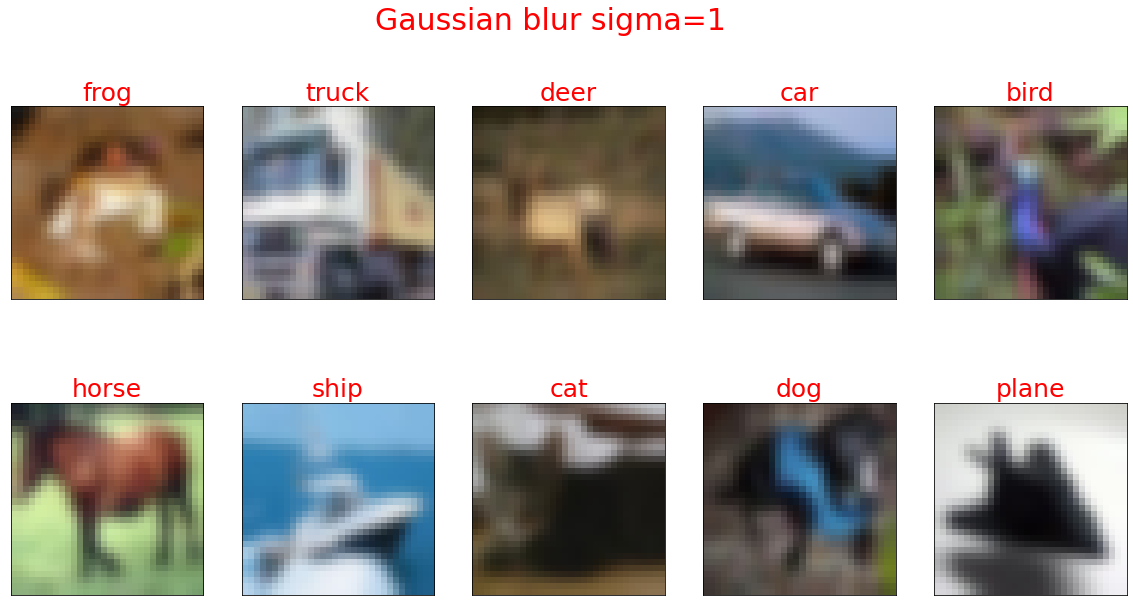

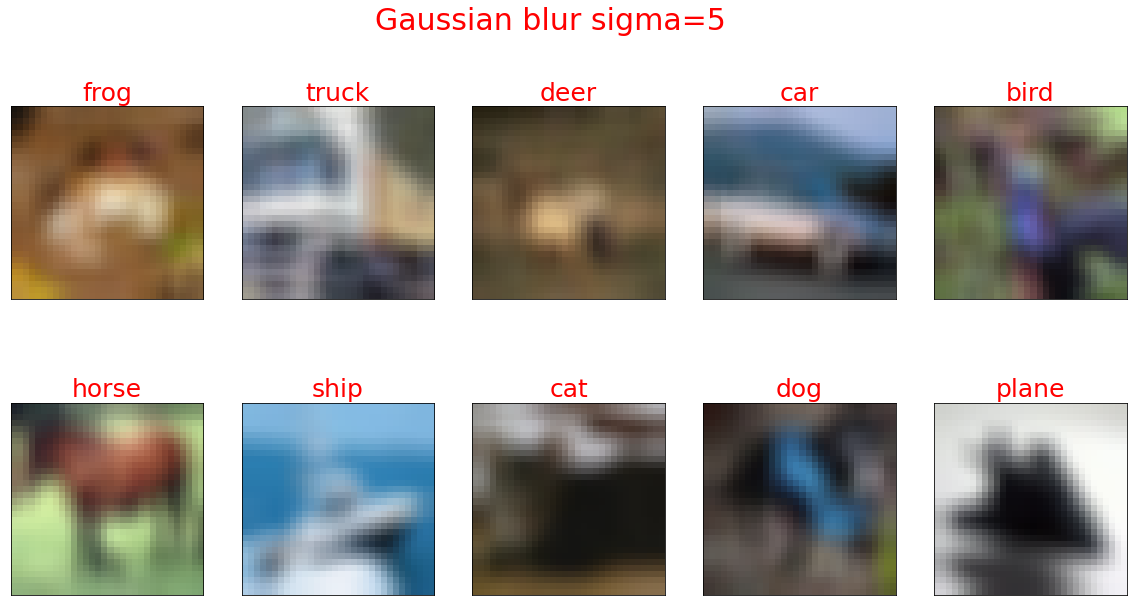

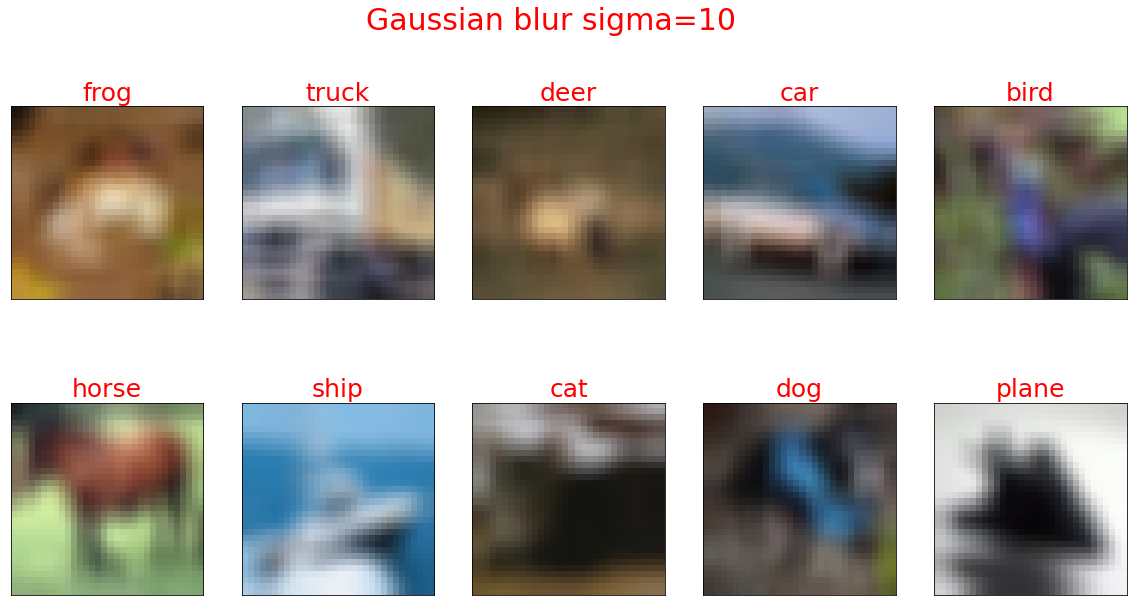

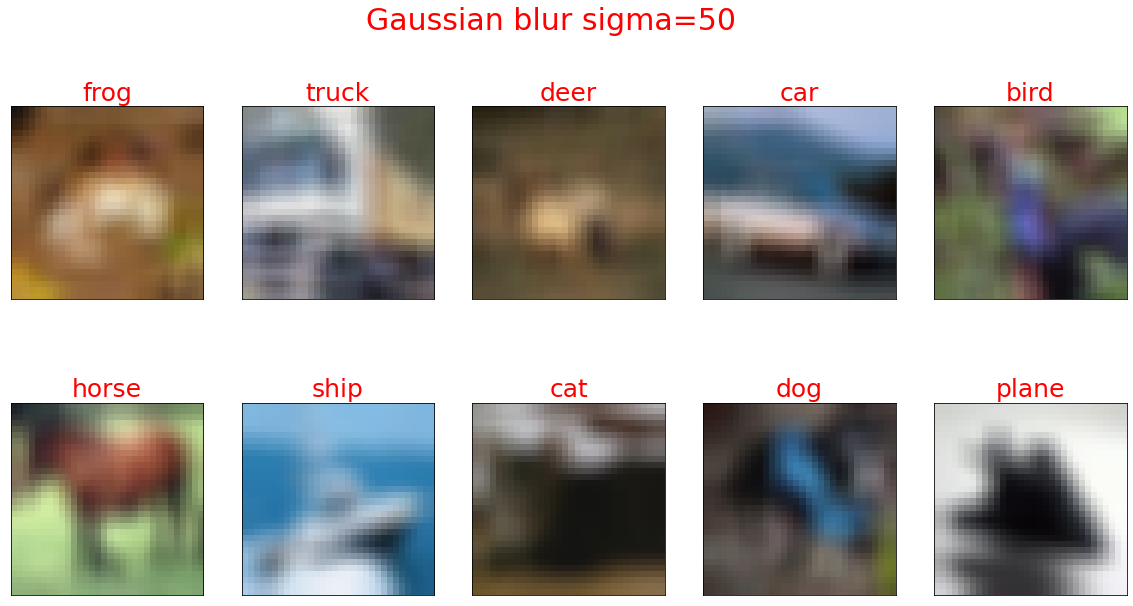

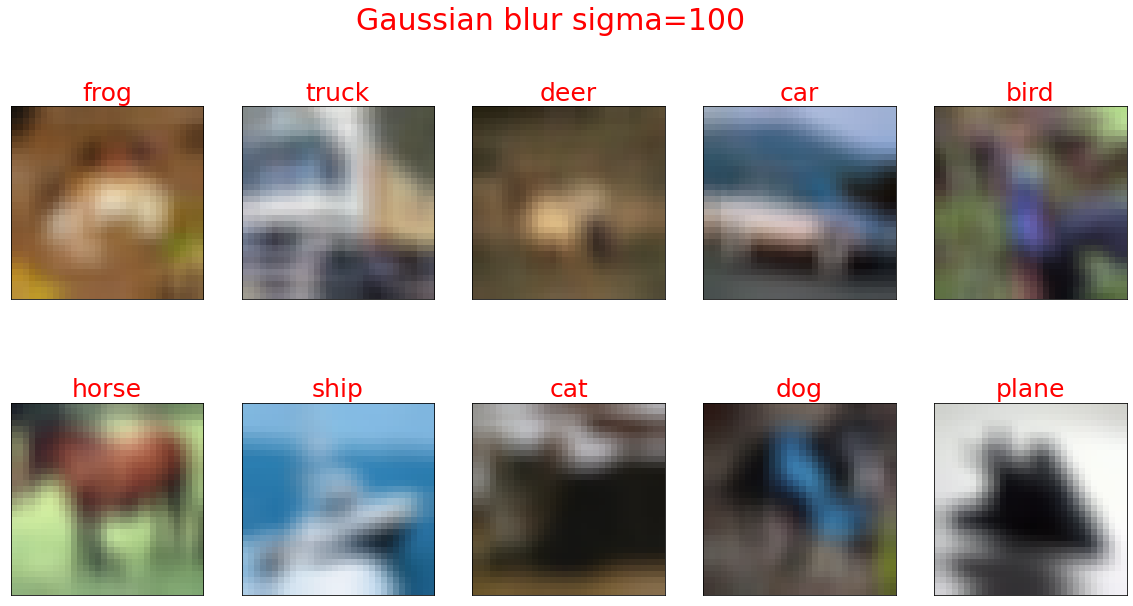

In [9]:
# Applying different sigma values for gaussian filter

sigma = [1,5,10,50,100]

for i in range(len(sigma)):
    gauss_blur(img,sigma[i])



### Median Filter

In [233]:
def median_blur(image,ksize):
    """ 
    Input:  image: list of input images
            ksize: kernel size, (i.e ksize=5) 

    Output: plots images after median blur has been applied 
    """

    # Apply Median Filter
    median_filter = []
    for i in range(len(image)):
        medblur = cv2.medianBlur(image[i],ksize=ksize)
        median_filter.append(medblur)

    plt.figure(figsize=(20,10))
    for i in range(len(median_filter)):
        plt.subplot(2,5,i+1), plt.imshow(median_filter[i])
        plt.title(titles[i], color='red',fontsize=25)
        plt.xticks([]), plt.yticks([])

    plt.suptitle(t='Median filtered image, Kernel='+str(ksize), color='red', fontsize=30)
    plt.show()

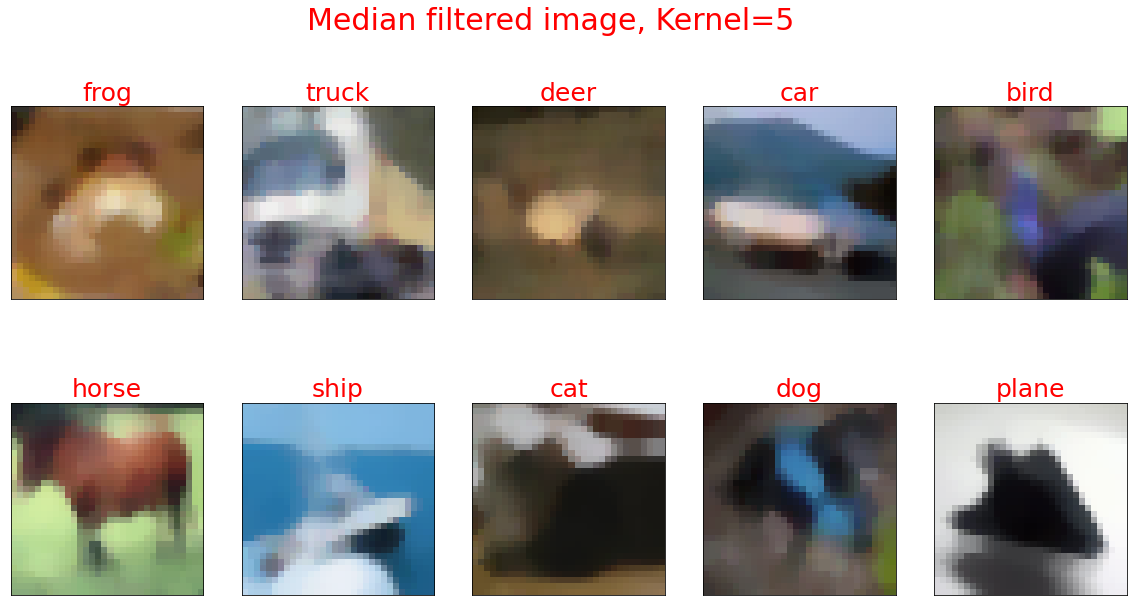

In [234]:
# Applying Median filter to images 
median_blur(img,ksize=5)

### Averaging filter

In [235]:
def avg_blur(image,ksize):

    """ 
    Input:  image: list of input images
            ksize: kernel size (i.e ksize=(5,5)) 

    Output: plots images after average filter has been applied 
    """

    avg_filter = [] 

    for i in range(len(image)):
        avgblur = cv2.blur(image[i],ksize=ksize)
        avg_filter.append(avgblur)


    plt.figure(figsize=(20,10))
    for i in range(len(avg_filter)):
        plt.subplot(2,5,i+1), plt.imshow(avg_filter[i])
        plt.title(titles[i], color='red',fontsize=25)
        plt.xticks([]), plt.yticks([])

    plt.suptitle(t='Average filtered image, Kernel='+str(ksize[0]), color='red', fontsize=30)
    plt.show()

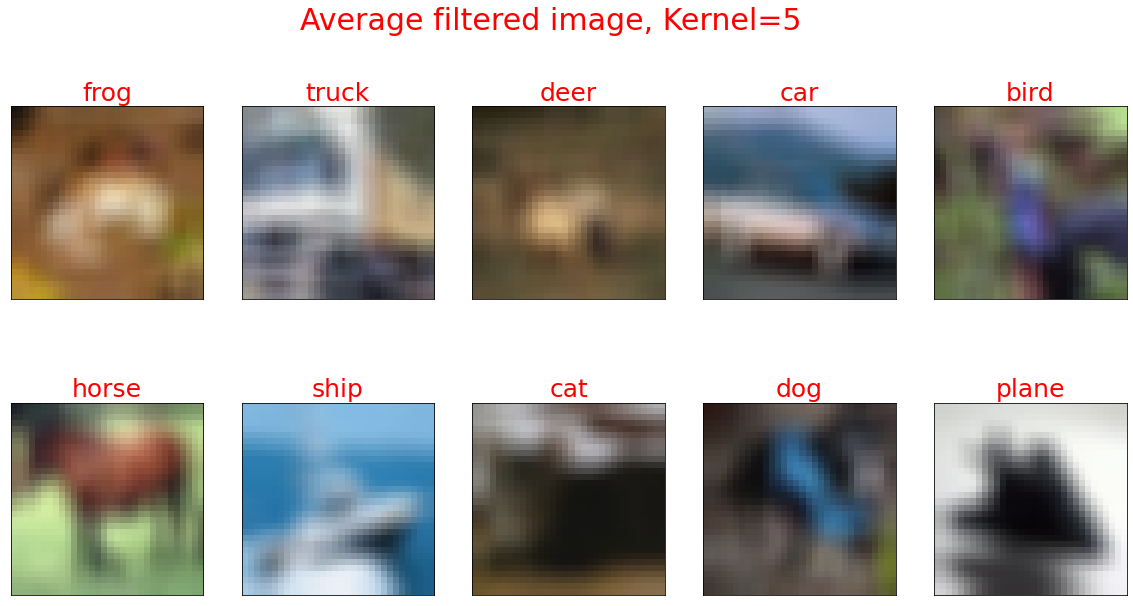

In [236]:
# Applying Average filter to images with kernel size of 5 
avg_blur(img,ksize=(5,5))

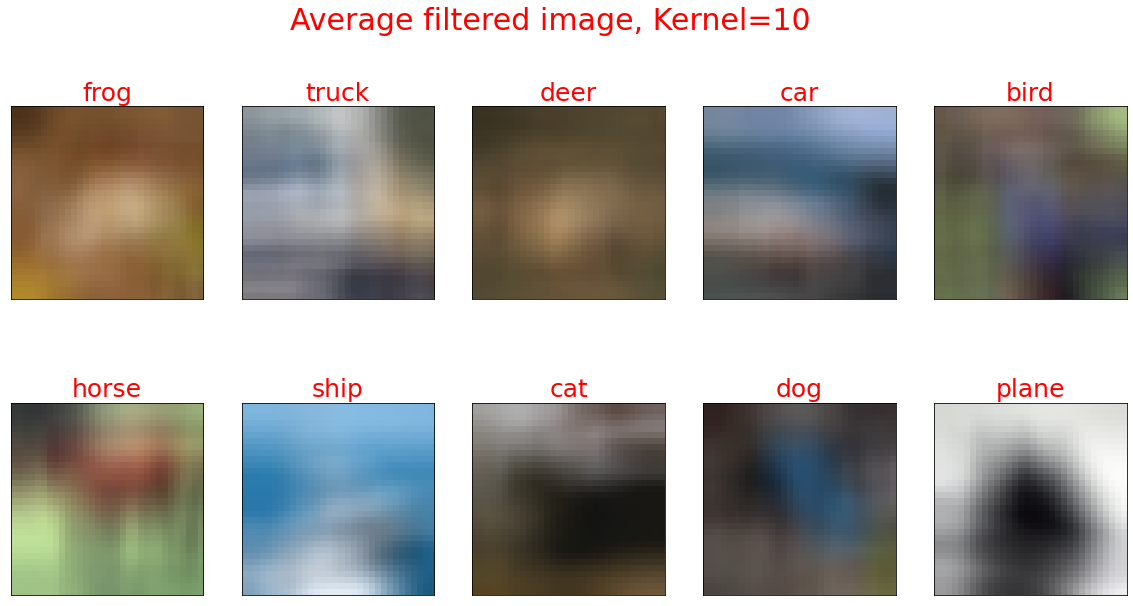

In [237]:
# Applying Average filter to images with kernel size of 10
avg_blur(img,ksize=(10,10))

## Problem 2: Edge Detection 

1. Apply Canny edge detector on each of the 10 images and plot the images. 
Try increasing & decreasing the default threshold values and plot the new image for each case. 
Explain observations from changning the thresholds. 

2. Derive the edge maps using a Sobel filter. Compare the edge maps using a canny edge detector and Sobel filter. What are the differences? Would you prefer a canny edge or Sobel filter? 

### Applying Canny Edge 

In [238]:
# Function that converts image to grayscale 

def gray_im(img_ls):

    """ 
    Input:  img: list of input images
    Output: list containing grayscaled images 
    """


    grayscale = []
    for i in range(len(img_ls)):
        gray = cv2.cvtColor(img_ls[i], cv2.COLOR_BGR2GRAY)
        grayscale.append(gray)
        
    return grayscale

In [239]:
def canny_edge(image,thresholdMin, thresholdMax):
    """ 
    Input:  img: list of input images
            thresholdMin: Min threshold for canny edge detection
            thresholdMax: Max threshold for canny edge detection

    Output: plots of images after Canny edge detector has been applied 
    """

    canny_im = [] 
    # Convert input image to grayscale 
    gray_img = gray_im(image)

    for i in range(len(gray_img)):
        edges = cv2.Canny(gray_img[i],thresholdMin,thresholdMax)
        canny_im.append(edges)

    plt.figure(figsize=(20,10))
    for i in range(len(canny_im)):
        plt.subplot(2,5,i+1), plt.imshow(canny_im[i],cmap='gray')
        plt.title(titles[i], color='red',fontsize=25)
        plt.xticks([]), plt.yticks([])

    plt.suptitle(t='Canny Edge, Min Threshold:'+str(thresholdMin) + ', Max Threshold: ' +str(thresholdMax), 
                 color='red', fontsize=30)
    plt.show()

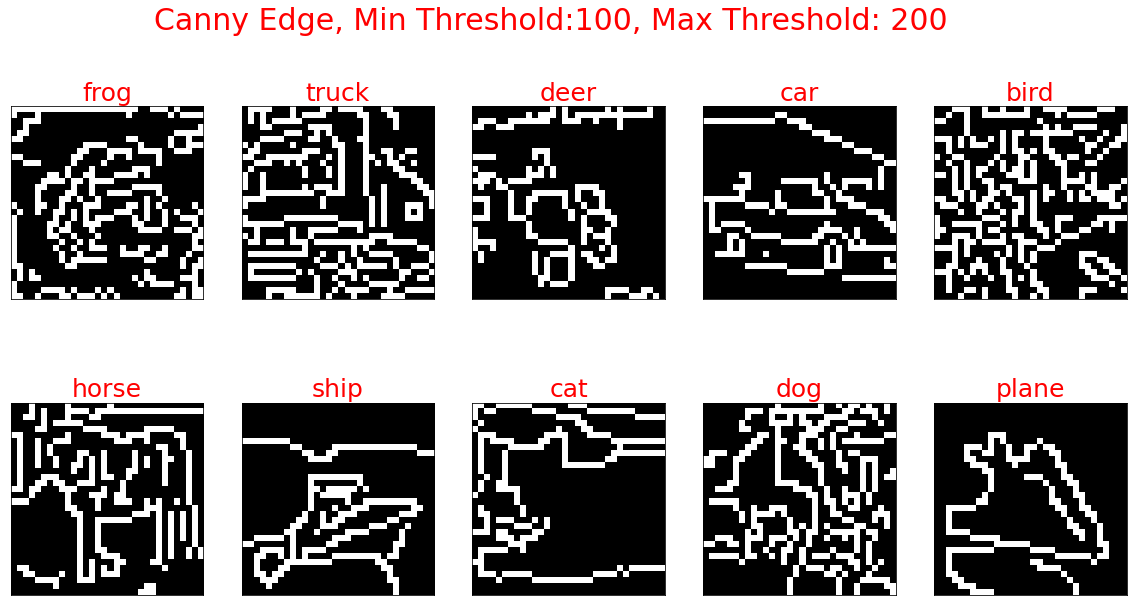

In [240]:
# gray_img = gray_im(img)
canny_edge(img,100,200)

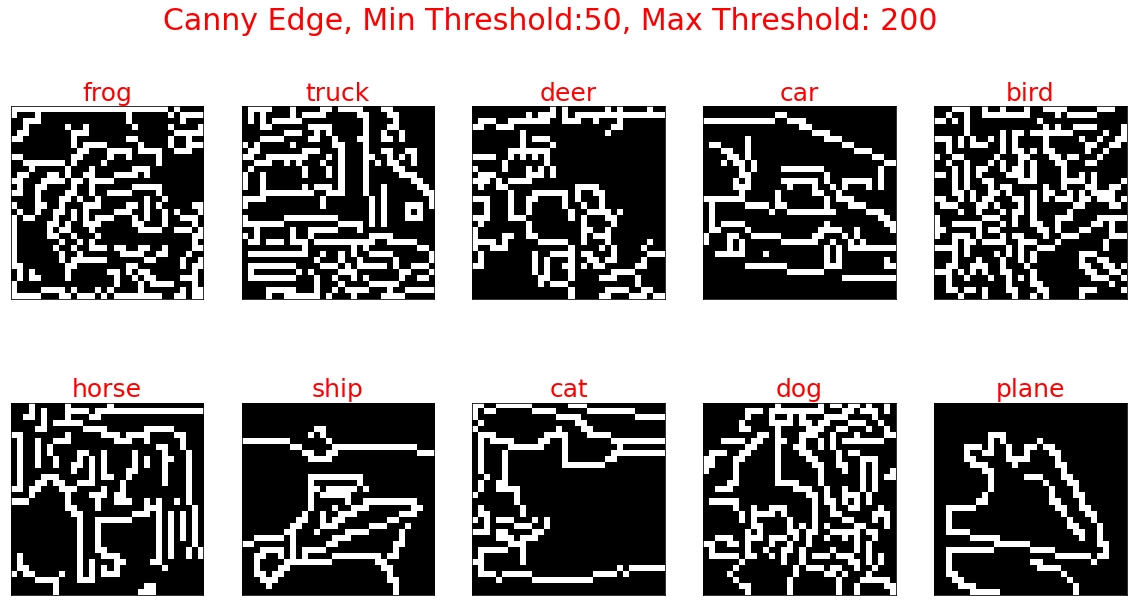

In [241]:
# Applying Canny Edge Detection 
# Min threshold = 50
# Max threshold = 200 

canny_edge(img,50,200)


# It was observed that as we decreased the minimum threshold, there are more edges in the output image. 
# This is because weaker edges are preserved the lower the minimum threshold. 


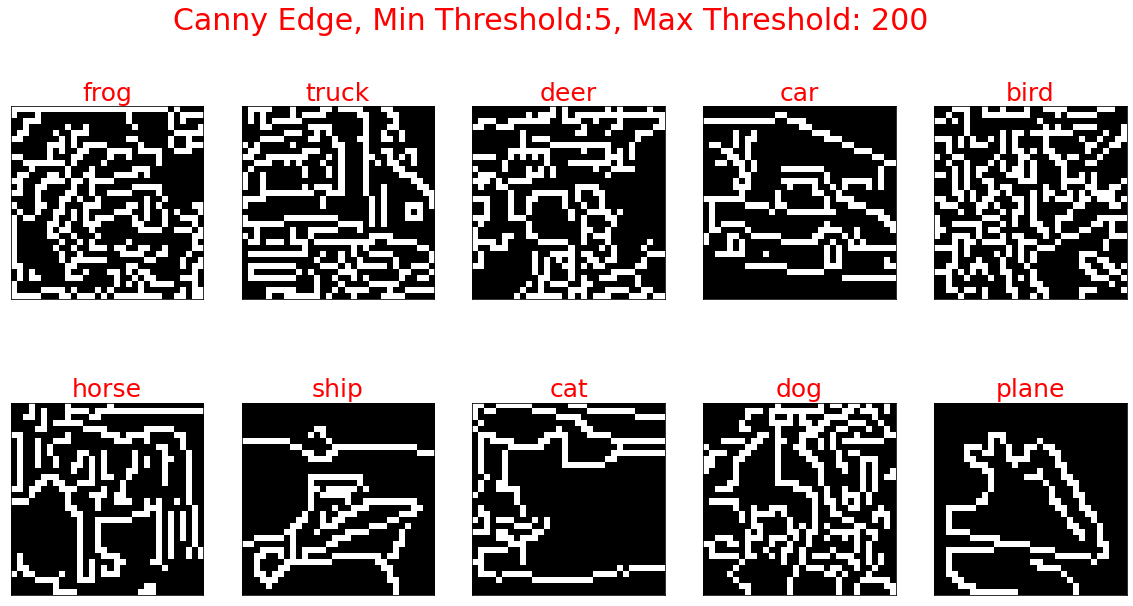

In [242]:
# Decreasing the minimum threshold 
# Min threshold = 5
# Max threshold = 200 
canny_edge(img,5,200)

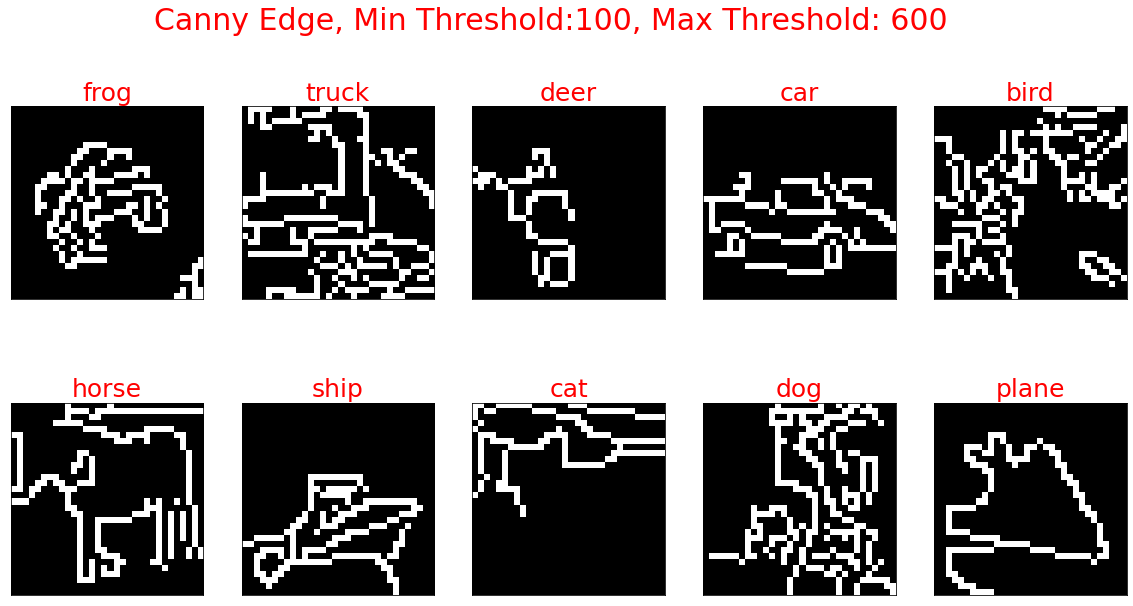

In [243]:
# Increasing the maximum threshold 
# Min threshold = 100 
# Max threshold = 600 
canny_edge(img,100,600)

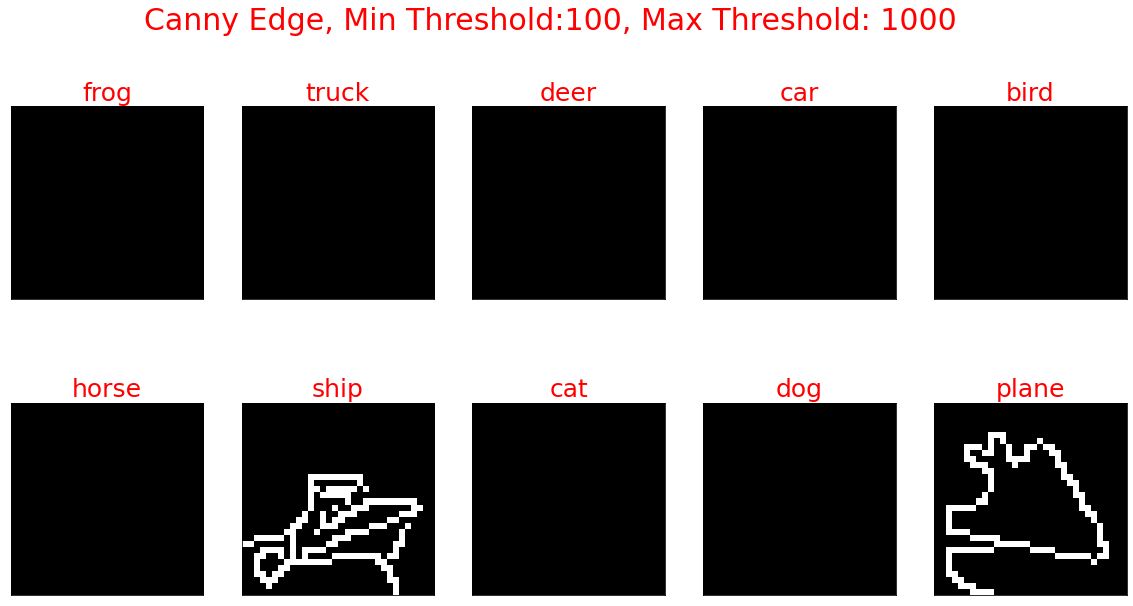

In [244]:
# Increasing the maximum threshold 
# Min threshold = 100 
# Max threshold = 1000 
canny_edge(img,100,1000)

### Applying Sobel Filter 

In [245]:
def sobel_filter(image,ksize=3):
    """ 
    Input:  image: list of input images. images should be converted to grayscale before hand
            ksize: size of kernel to be applied

    Output: plots of images after Sobel filter has been applied 
    """


    sobel_im = [] 
    gray_img = gray_im(image)

    for i in range(len(image)):
        sobelx = cv2.Sobel(gray_img[i],cv2.CV_64F,1,0,ksize=ksize)
        sobely = cv2.Sobel(gray_img[i],cv2.CV_64F,0,1,ksize=ksize)

        combined_sobel = cv2.magnitude(sobelx, sobely)
        combined_sobel = cv2.normalize(combined_sobel, None, 0, 255, cv2.NORM_MINMAX)
        sobel_im.append(combined_sobel)

    plt.figure(figsize=(20,10))
    for i in range(len(sobel_im)):
        plt.subplot(2,5,i+1), plt.imshow(sobel_im[i],cmap='gray')
        plt.title(titles[i], color='red',fontsize=25)
        plt.xticks([]), plt.yticks([])

    plt.suptitle(t='Sobel Filter, ksize='+str(ksize), color='red', fontsize=30)
    plt.show()

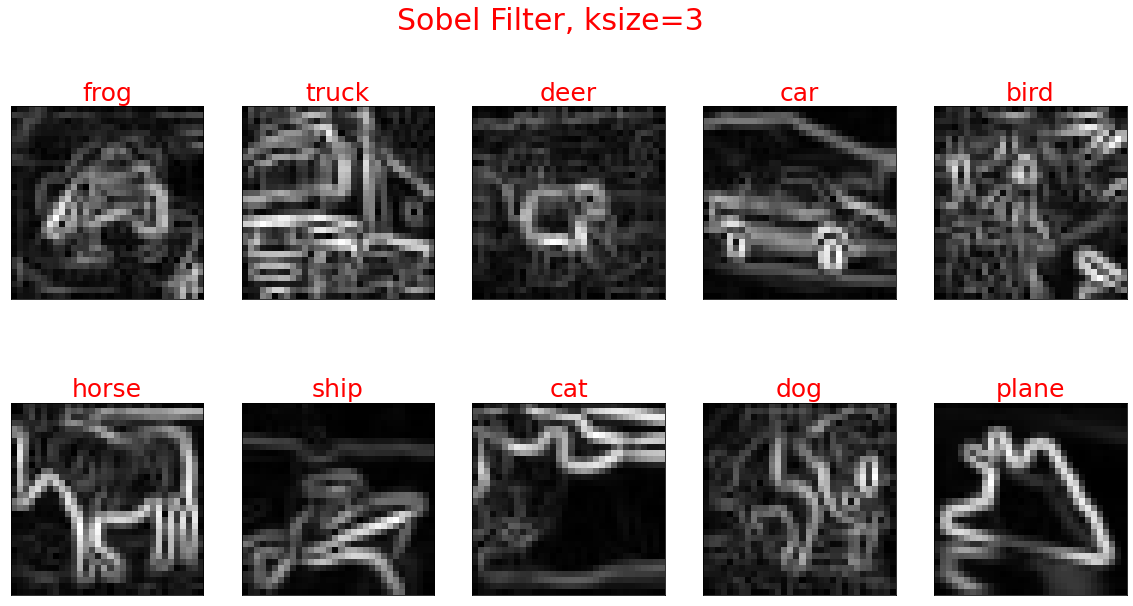

In [246]:
# Applying Sobel Filter 
sobel_filter(img,3)

## Problem 3: Corner Detection 

1. Apply Harris Corner detector on each of the 10 images. Use parameter as 0.04. 
2. Repeat using parameter 0.07. What are your observations when parameter value increased?

   What are the effects? 

In [247]:
def harris_corner(img,parameter=0.04):
    """ 
    Input:  img: list of input images 
    Output: original input image that is overlayed with the location of detected corners. 
    """

    # Creates a copy of the original input images 
    image = np.copy(img)

    # Converts the input image to grayscale 
    gray_ls = gray_im(image)

    harris = []
    # Applying Harris Corner algo to images 
    for i in range(len(gray_ls)):
        corner = cv2.cornerHarris(gray_ls[i],blockSize=2, ksize=3,k=parameter)
        
        # This part of the code will overlay the location of corners onto the original image
        dst = cv2.dilate(corner,None)
        image[i][dst>0.01*dst.max()]=[0,0,255]
        harris.append(image[i])



    # Plotting the figures 
    plt.figure(figsize=(20,10))
    for i in range(len(harris)):
        plt.subplot(2,5,i+1), plt.imshow(harris[i],cmap='gray')
        plt.title(titles[i], color='red',fontsize=25)
        plt.xticks([]), plt.yticks([])

    plt.suptitle(t='Harris Corners, parameter k='+str(parameter), 
                 color='red', fontsize=30)
    plt.show()

    


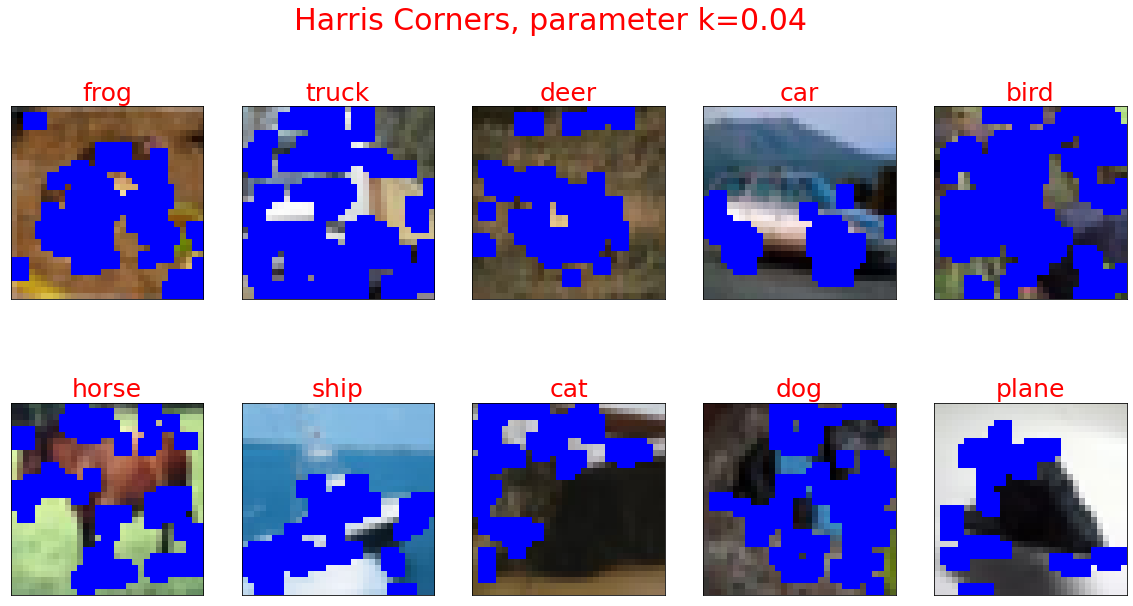

In [248]:
harris_corner(img,0.04)

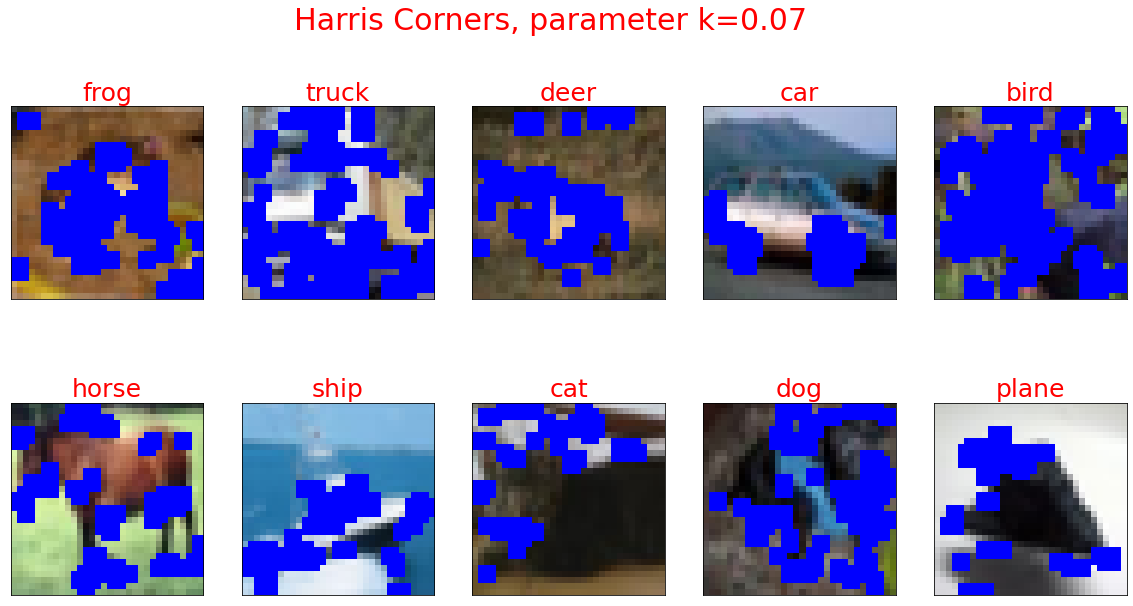

In [249]:
harris_corner(img,0.07)

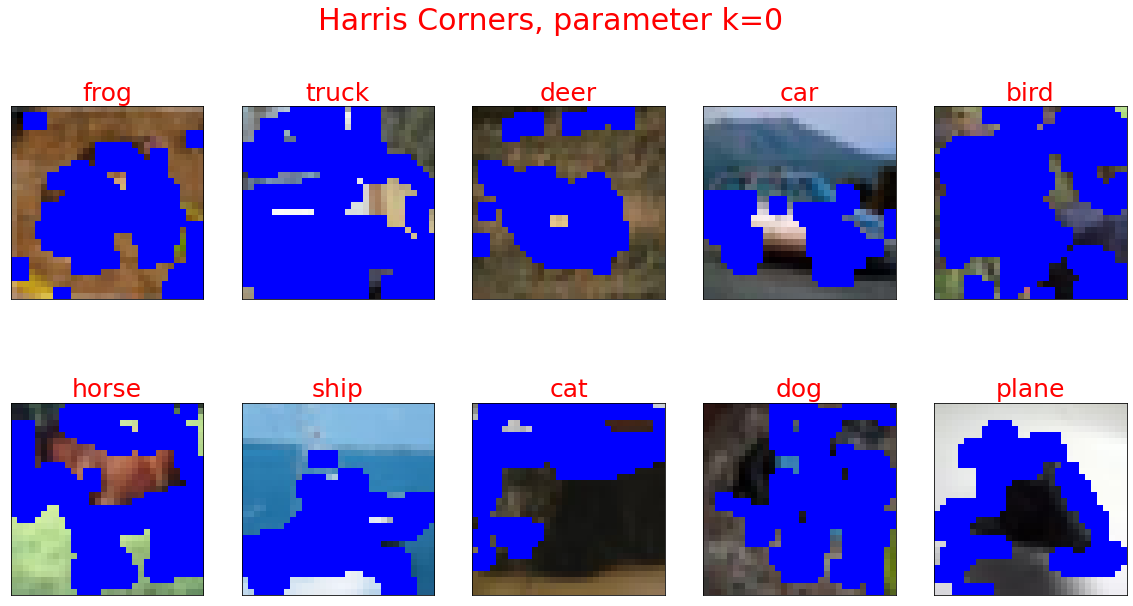

In [250]:
harris_corner(img,0)

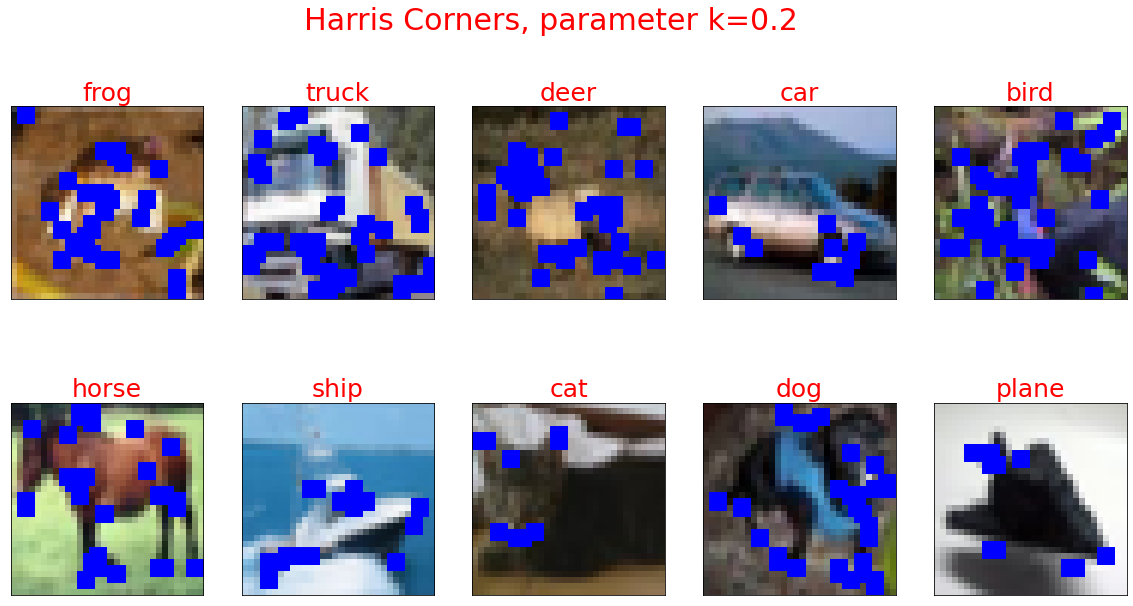

In [251]:
harris_corner(img,0.2)

## Problem 4: Convolution and Correlation 

1. Implement 2D-Convolution & 2D-Correlation to an image. Specify kernel size. Plot outputs and explain differences observed. 

    __Analysis:__ <br>
    The kernel size used was a 3x3 box filter. <br>
    It should be noted that the main difference between a 2D-convolution and 2D-correlation operation is that for a CONVOLUTION, the kernel is flipped horizontally and vertically before performing the element-wise operation. <br>

    When applying 2D-convolution and 2D-correlation, it was observed that the output image for both operations was the same. 
    This is because the box filter is a symmetric kernel, which means that the output will be the same regardless if the kernel is flipped or not. 

In [252]:
def conv2d(image, kernel):
    """ 
    Input:  image: input image to perform Convolution. This image should be grayscaled 
            kernel: box filter to be applied 
    Output: Convolved image 
    """


    # Obtaining input dimensions to calculate output image dimensions 
    image_height, image_width = image.shape[0], image.shape[1]
    kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]
    
    # Calculating dimensions of the output image
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    # Initialize output image 
    output = np.zeros((output_height, output_width))
    
    # Performing CONVOLUTION
    for i in range(output_height):
        for j in range(output_width):
            # Note that the "np.flip()" is used for a convolution. This is not required for a correlation 
            output[i][j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * np.flip(kernel,axis=(0,1)))
    
    return output


def corr2d(image, kernel):
    """ 
    Input:  image: input image to perform Correlation. This image should be grayscaled 
            kernel: box filter to be applied 
    Output: Correlated image 
    """


    # Obtaining input dimensions to calculate output image dimensions 
    image_height, image_width = image.shape[0], image.shape[1]
    kernel_height, kernel_width = kernel.shape[0], kernel.shape[1]
    
    # Calculating dimensions of the output image
    output_height = image_height - kernel_height + 1
    output_width = image_width - kernel_width + 1
    
    # Initialize output image 
    output = np.zeros((output_height, output_width))
    
    # Performing CORRELATION 
    for i in range(output_height):
        for j in range(output_width):
            # Note that the "np.flip()" is used for a convolution. This is not required for a correlation 
            output[i][j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)

    
    return output


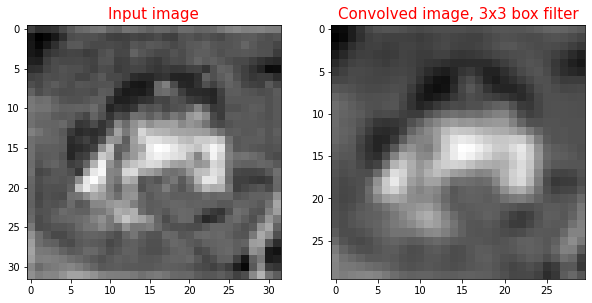

In [253]:
# Performing CONVOLUTION 

# Specifying box filter
kernel_2 = np.ones((2,2))*1/4
kernel_3 = np.ones((3,3))*1/9
kernel_5 = np.ones((5,5))*1/25

# Creating grayscale images 
gray_images = gray_im(img)

# Perform the convolution
output = conv2d(gray_images[0], kernel_3)

# Plotting input image & ouput image
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(gray_images[0],cmap='gray')
plt.title('Input image', color='red',fontsize=15)

plt.subplot(1,2,2)
plt.imshow(output, cmap='gray')
plt.title('Convolved image, 3x3 box filter', color='red',fontsize=15)

plt.show()



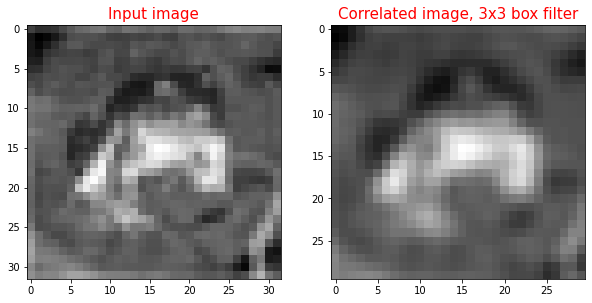

In [254]:
# Performing CORRELATION 

# Specifying box filter
kernel_2 = np.ones((2,2))*1/4
kernel_3 = np.ones((3,3))*1/9
kernel_5 = np.ones((5,5))*1/25

# Creating grayscale images 
gray_images = gray_im(img)

# Perform the convolution
output = corr2d(gray_images[0], kernel_3)

# Plotting input image & ouput image
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(gray_images[0],cmap='gray')
plt.title('Input image', color='red',fontsize=15)

plt.subplot(1,2,2)
plt.imshow(output, cmap='gray')
plt.title('Correlated image, 3x3 box filter', color='red',fontsize=15)

plt.show()